In [1]:
import numpy as np
import scipy as sp
from tqdm import tqdm
import matplotlib.pyplot as plt 

In [8]:
nu = 10/3
gamma = 50/3
eta = 3.5
a = 33.33
q = 0.05
f = 0.1

def F(state, p):
    b, w, h = state

    L2 = np.power(1+eta*b, 2)
    Gb = nu*w*L2
    Gw = gamma*b*L2
    I = a * (b + q*f) / (b + q)

    r0 = Gb*b*(1-b) - b 
    r1 = I*h - nu*w - Gw*w
    r2 = p - I*h

    return np.array([r0, r1, r2])

In [22]:
ps = np.linspace(0, 3, 1000)
N = 10
guess = np.array([1, 1, 1])
results = []
for p in ps:
    results.append(sp.optimize.root(F, guess, args=p).x)
results = np.array(results)

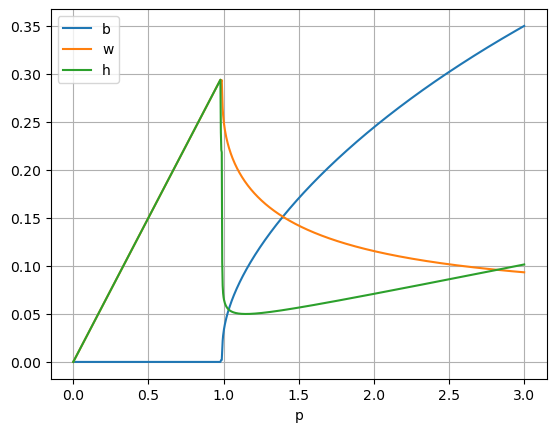

In [23]:
bs = results[:, 0]
ws = results[:, 1]
hs = results[:, 2]

cws = ps / nu
plt.plot(ps, bs, label="b")
plt.xlabel("p")
plt.grid()
plt.plot(ps, ws, label="w")
plt.plot(ps, hs, label="h")
plt.legend()

In [21]:
sp.optimize.root(f, guess, args=1.001).x

array([0.03228617, 0.25025498])